### **Multiple Linear Regression**

1. **What is it?**

* Instead of a single predictor (X), multiple independent variables are used (*X₁, X₂, …, Xₙ*).
* Each variable has a **weight (w)** that measures its influence on Y, plus a **bias (b)**.
* The equation becomes:

$$
\hat{y} = w_1X_1 + w_2X_2 + … + w_nX_n + b
$$

2. **Tensor Representation**

* An input sample is a **(1×D) vector**.
* The weights are a **(D×1) vector**.
* The prediction is calculated as the **dot product** of X and w, plus the bias.
* For multiple samples, use a **matrix X (N×D)** where N = number of samples and D = number of features.

3. **Visualization**

* Each sample can be colored to show how it is transformed.
* Directed graphs (nodes = features, edges = weights) help understand the mechanism, also useful for neural networks.

4. **Using PyTorch**

* Use `nn.Linear(in_features, out_features)`, which directly implements the linear function.
* The parameters (weights and biases) are initialized randomly.
* We can inspect them with `parameters()` or `state_dict()`.
* Input → tensor (samples as rows). Output → tensor with predictions.

5. **Custom Module**

* In PyTorch, you can create custom modules by inheriting from `nn.Module`.
* It implements a constructor (`__init__`) and the `forward` method.
* Although similar to `nn.Linear`, it serves as a foundation for building more complex models (e.g., neural networks).

---

### In Summary

* Multiple linear regression is a linear transformation that combines independent variables to predict an output.
* In PyTorch, it's easily managed with `nn.Linear`, which automates weights and biases.
* Creating a custom module is a crucial intermediate step in understanding how neural network building blocks work.§

In [ ]:
# Import the libraries and set the random seed
from torch import nn
import torch
torch.manual_seed(1)

# In PyTorch, weights and biases for models (nn.Linear, neural networks, etc.) are initialized randomly.
# If you don't specify a seed, the values ​​change every time you run the program → different results.
# If you specify torch.manual_seed(1), you always get the same sequence of random numbers, and therefore the same initial weights.

### **Prediction**

Set weight and bias.

In [ ]:
w = torch.tensor([[2.0], [3.0]], requires_grad=True) # weights
b = torch.tensor([[1.]], requires_grad=True) # bias

Define the parameters. torch.mm uses matrix multiplication instead of scaler multiplication.

In [ ]:
# Define the model
def forward(x):
    yhat = torch.mm(x, w) + b
    return yhat

$$ y = xw + b $$

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.1_matrix_eq.png" width="600" alt="Matrix Linear Regression">


1. **x** → the input data (features).

* It can be a single sample (vector) or multiple samples (matrix).
* Ex: in the case of multiple linear regression, each column is an independent variable $X_1, X_2, ... X_D$.

2. **w (weights)** → the model weights.

* These are **trainable parameters** that change during training.
* They indicate the importance of each variable in influencing the output.

3. **b (bias)** → offset term.

* This is not an "error", but a constant that **translates** the line (or hyperplane) with respect to the origin.
* It is used to allow the model to better fit the data even when the inputs are zero.

4. **yhat** → the predicted output.

* This is the linear combination of the inputs with the weights plus the bias.

In [15]:
# Calculate yhat
x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("The result: ", yhat)

The result:  tensor([[9.]], grad_fn=<AddBackward0>)


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/JBkvPoMCCa-PDXCF_4aQfQ/image%20-1-.png" width="300" alt="Linear Regression Matrix Sample One">


# Each row of the following tensor represents a sample:

In [16]:
# Sample tensor X

X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

# Make the prediction of X 

yhat = forward(X)
print("The result: ", yhat)

The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


In [ ]:
# Linear Regression Class

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        # input size are features, the output it's just the predicted value
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
        
    # Prediction Function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [21]:
# Practice: Build a model to predict the follow tensor.
X = torch.tensor([[11.0, 12.0, 13, 14], # first row 
                  [11, 12, 13, 14]])  # second row

# It has the form (2, 4) → 2 rows and 4 columns.
# Each row is a sample.
# Each column is a feature (independent variable).


model = linear_regression(4, 1)


In [23]:
# Prediction 
yhat = model(X)
yhat

tensor([[6.2828],
        [6.2828]], grad_fn=<AddmmBackward0>)

### Cost function

1. **Cost function**

* It is used to measure how far the predictions $\hat{y}$ are from the actual values ​​$y$.
* In regression, the **MSE (Mean Squared Error)** is commonly used:

$$
\text{MSE} = \frac{1}{N} \sum (y - \hat{y})^2
$$

2. **Model parameters**

* If you have $d$ inputs (features), the model has **d weights + 1 bias**.
* Ex: 2-dimensional input → 3 parameters (w₁, w₂, b).
* 3-dimensional input → 4 parameters (w₁, w₂, w₃, b).

3. **Gradient descent**

* Calculate the derivative of the loss with respect to weights and biases.
* Update the parameters in the direction that reduces the error:

$$
w := w - \eta \frac{\partial L}{\partial w}, \quad b := b - \eta \frac{\partial L}{\partial b}
$$

where $\eta$ is the learning rate.

---

### Implementation in PyTorch

1. **Dataset**

* A `Data2D` class is used (two input variables, one output).
* The data is loaded with a **DataLoader** that returns batch (here batch\_size=2).

2. **Model**

* Created with `nn.Linear(2,1)` → 2 input features, 1 output.

3. **Criterion (loss function)**

* Use `nn.MSELoss()` to calculate the mean squared error.

4. **Optimizer**

* Ex: `torch.optim.SGD(model.parameters(), lr=0.1)` to update the weights.

5. **Training loop**
For each epoch:

* Make the prediction (`yhat = model(x)`).
* Calculate the loss.
* Set the gradients to zero (`optimizer.zero_grad()`).
* Perform backpropagation (`loss.backward()`).
* Update the parameters (`optimizer.step()`).

---

### Result

* Initially, the plane (the learned linear function) **does not fit the data well**.
* After ~100 epochs, the plan adapts and follows the dataset points much better.

---

In summary:
The algorithm is used to **teach the model the optimal values ​​of weights and biases** to reduce the error between predictions and actual data, using **gradient descent** and a **cost function**.

---

### **What it is:** Multi-output linear regression.

With $D$ input features and $M$ outputs, the model is

$$
\mathbf{y} = W^\top \mathbf{x} + \mathbf{b}
$$

where $W \in \mathbb{R}^{D\times M}$ (columns = features/outputs) and $\mathbf{b} \in \mathbb{R}^{M}$.

* **Column insight:** Each **column of $W$** defines a different linear function of the input $\mathbf{x}$. Take the **dot product** $\mathbf{x}\cdot W_{:,j}$ and then add $b_j$ → you get the $j$-th output.

* **Sample batch:** with $X \in \mathbb{R}^{N\times D}$ (rows = samples) the prediction is

$$
Y = XW + \mathbf{b}
$$

with $Y \in \mathbb{R}^{N\times M}$. The bias is broadcast across all rows.

* **Element-by-element reading:** $Y_{i,j} = X_{i,:}\cdot W_{:,j} + b_j$.

* **PyTorch:** uses `nn.Linear(in_features=D, out_features=M)`.

* Single input: `x` with shape `(D,)` → output `(M,)`.
* Batch: `X` with shape `(N, D)` → output `(N, M)`.
(Internally, PyTorch stores the weights as `(M, D)` and adds the bias `(M,)`.)

* **Mental graph:** feature nodes → (weights = edges) → output nodes. Each output sums weights × features + bias.

* **Basic idea**: We want a **model** that, given one **input** (several numbers together), produces **multiple results** instead of just one.

---

In [1]:
from torch import nn
import torch    

In [2]:
torch.manual_seed(1)

In [4]:
class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        # input size are features, the output it's just the predicted value
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
        
    # Prediction Function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
model = linear_regression(1, 10)
model(torch.tensor([[1.0]]))

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887]], grad_fn=<AddmmBackward0>)

<img src="https://ibm.box.com/shared/static/icmwnxru7nytlhnq5x486rffea9ncpk7.png" width="600," align="center">

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

In [7]:
x=torch.tensor([[1.0]])

In [8]:
# we can make a prediction with the model
yhat = model(x)
yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887]], grad_fn=<AddmmBackward0>)

In [ ]:
# each row in the following tensor represents a different sample with a single feature

X=torch.tensor([[1.0],[1.0],[3.0]])
Yhat=model(X)
Yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward0>)

 <img src="https://ibm.box.com/shared/static/768cul6pj8hc93uh9ujpajihnp8xdukx.png" width="600," align="center">

### **Training Linear Regression Multiple Outputs**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [2]:
# Set the random seed
torch.manual_seed(1)

In [3]:
# Create a dataset class with two-dimensional features and two targets: 
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len


In [4]:
# create a dataset object 
data_set=Data()

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>

In [5]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  

In [6]:
model=linear_regression(2,2)

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  

<img src="https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width="100," align="center">

In [7]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:

In [8]:
criterion = nn.MSELoss()

Create a data loader object and set the batch_size to 5:

In [9]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>

Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.

In [10]:
LOSS=[]

epochs=100

for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()


Plot the cost:

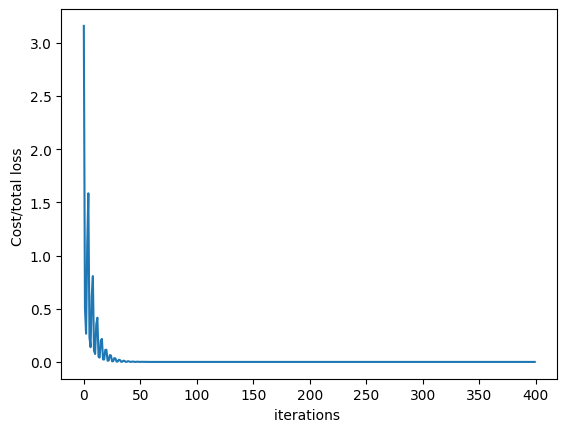

In [11]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

### 1. **Objective**

Train a **linear regression model with two inputs and two outputs** using PyTorch, that is, teach the model the relationship between the data and the labels (targets).

---

### 2. **Create the data**

* Define a `Data` class that generates:

* **input (x)**: pairs of numbers (2 columns).
* **target (y)**: values ​​calculated with a formula that uses weights and biases, plus a small amount of noise.

---

### 3. **The model**

* Create a `linear_regression` class that uses the pre-built `nn.Linear` layer.
* This layer learns the **weights** and **biases** that connect inputs → outputs.

---

### 4. **Optimizer and Cost**

* **Optimizer**: `optim.SGD` with learning rate 0.1 → used to update the weights.
* **Cost Function**: `nn.MSELoss()` → measures how far the predictions are from the targets (smaller = better).

---

### 5. **Data Loader**

* A `DataLoader` is used with batches of 5 → instead of passing all the data at once, it sends it to the model in chunks.

---

### 6. **Training**

* **100 epochs** cycle:

1. The model makes a **prediction**.
2. The **loss** (error) is calculated.
3. The old gradients are reset to zero.
4. The **new gradients** are calculated (how much to change the weights).
5. The optimizer takes a step → updates the parameters.

---

### 7. Result

* The loss is saved at each step.
* Finally, a graph is drawn: the error should decrease over time.

---